In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_score, 
    recall_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [25]:
df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [26]:
from sklearn.preprocessing import LabelEncoder

df=df.drop(['name', 'artists', 'album_name'], axis=1)

mode_order = sorted(df['genre'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print (mode_order_mapping)

df['genre'] = df['genre'].map (mode_order_mapping).astype(int)

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

{'afrobeat': 0, 'black-metal': 1, 'bluegrass': 2, 'brazil': 3, 'breakbeat': 4, 'chicago-house': 5, 'disney': 6, 'forro': 7, 'happy': 8, 'idm': 9, 'indian': 10, 'industrial': 11, 'iranian': 12, 'j-dance': 13, 'j-idol': 14, 'mandopop': 15, 'sleep': 16, 'spanish': 17, 'study': 18, 'techno': 19}


In [27]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,293106,0,50,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,0
1,194972,0,52,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,0
2,178428,0,22,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,0
3,238373,0,20,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,0
4,221893,0,22,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,0


In [28]:
X = df.values
y = np.array(df['genre'])
X = df.drop('genre', axis=1)

## Partitioning

In [29]:
from sklearn.model_selection import train_test_split

random_state = 0

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=random_state
)

print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test), ("\n"))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05] 

(9000, 15) (6000, 15) (9000,) (6000,)


## normalization

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [35]:
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([ 4,  0, 17, ..., 14,  7,  1])

In [36]:
clf.score(X_test_norm, y_test)

0.43966666666666665

In [37]:
(y_test_pred == y_test).sum() / len(y_test)

0.43966666666666665

In [40]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.43966666666666665


In [38]:
from sklearn.model_selection import learning_curve

In [43]:
print("F1 macro:", f1_score(y_test, y_test_pred, average="macro"), "\n")
print("F1 micro:", f1_score(y_test, y_test_pred, average="micro"), "\n")
unique_labels = np.unique(y_test)

for label in unique_labels:
    print(f"F1 macro for label {label}:", f1_score(y_test, y_test_pred, labels=[label], average="macro"))
print("\n")
for label in unique_labels:
    print(f"F1 micro for label {label}:", f1_score(y_test, y_test_pred, labels=[label], average="micro"))

F1 macro: 0.43759184156208847 

F1 micro: 0.43966666666666665 

F1 micro for label 0: 0.24785276073619633
F1 micro for label 1: 0.5806451612903225
F1 micro for label 2: 0.49386084583901785
F1 micro for label 3: 0.31818181818181823
F1 micro for label 4: 0.2641509433962264
F1 micro for label 5: 0.49133858267716535
F1 micro for label 6: 0.43697478991596644
F1 micro for label 7: 0.5909090909090909
F1 micro for label 8: 0.4094488188976378
F1 micro for label 9: 0.294234592445328
F1 micro for label 10: 0.3443223443223443
F1 micro for label 11: 0.263653483992467
F1 micro for label 12: 0.4715127701375246
F1 micro for label 13: 0.5008635578583766
F1 micro for label 14: 0.5316045380875203
F1 micro for label 15: 0.3898573692551506
F1 micro for label 16: 0.7805755395683454
F1 micro for label 17: 0.16414686825053995
F1 micro for label 18: 0.7003367003367004
F1 micro for label 19: 0.4773662551440329


F1 macro for label 0: 0.24785276073619633
F1 macro for label 1: 0.5806451612903225
F1 macro for labe

In [41]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.20      0.34      0.25       300
           1       0.50      0.69      0.58       300
           2       0.42      0.60      0.49       300
           3       0.29      0.35      0.32       300
           4       0.27      0.26      0.26       300
           5       0.47      0.52      0.49       300
           6       0.44      0.43      0.44       300
           7       0.58      0.61      0.59       300
           8       0.39      0.43      0.41       300
           9       0.36      0.25      0.29       300
          10       0.38      0.31      0.34       300
          11       0.30      0.23      0.26       300
          12       0.57      0.40      0.47       300
          13       0.52      0.48      0.50       300
          14       0.52      0.55      0.53       300
          15       0.37      0.41      0.39       300
          16       0.85      0.72      0.78       300
          17       0.23    

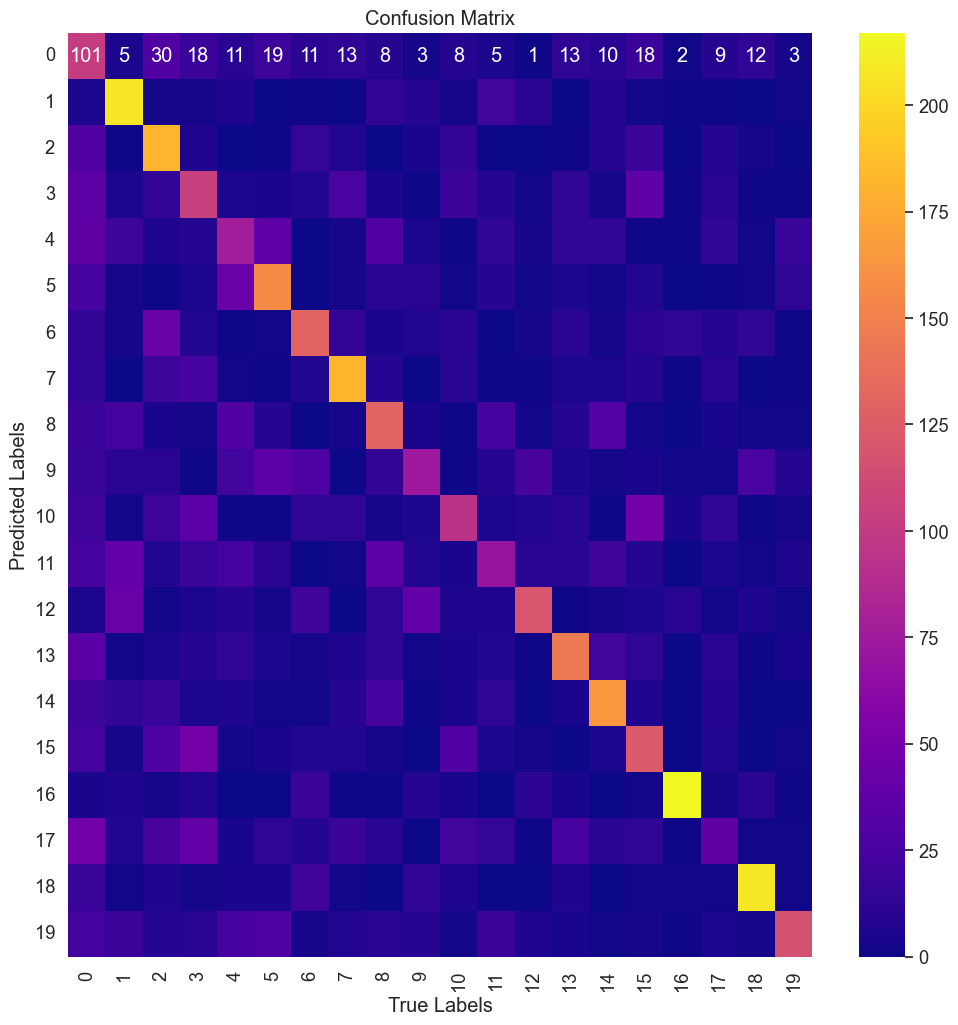

In [49]:
cf = confusion_matrix(y_test, y_test_pred)
# cf = confusion_matrix(y_test, y_test_pred, normalize="true")

# Imposta le dimensioni del plot e la scala del font
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.2)

# Crea il heatmap della matrice di confusione
sns.heatmap(cf, annot=True, cmap="plasma", fmt='g')

# Aggiunge titoli e etichette
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

# Ruota le etichette se necessario
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostra il plot
plt.show()

In [50]:
y_test_pred_proba = clf.predict_proba(X_test_norm) 
y_test_pred_proba[0:10]

array([[0.2, 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,
        0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0.4],
       [0. , 0. , 0. , 0. , 0.4, 0.4, 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0.2, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0

train_sizes = np.linspace(0.1, 1.0, 10)

Questa riga crea un array di dieci numeri che sono equamente spaziati tra 0.1 e 1.0. Questi numeri rappresenteranno le proporzioni del set di allenamento che verranno utilizzate per generare la curva di apprendimento. Ad esempio, se hai 1000 esempi di allenamento, il primo punto della curva di apprendimento userà il 10% di questi dati, cioè 100 esempi.

estimator=clf

Qui, stai assegnando il tuo modello k-NN, che hai chiamato clf nello screenshot precedente, alla variabile estimator. Questo modello verrà utilizzato dalla funzione learning_curve per allenare e testare il modello.

X = df.drop('genre', axis=1)
y = df['genre']

Queste due righe selezionano le features e il target dal tuo DataFrame. X contiene tutte le colonne tranne 'genre', che è la colonna del target che si presume tu voglia prevedere. y contiene i valori della colonna 'genre'.

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

Qui, crei un oggetto StandardScaler, che normalizza i dati delle features sottraendo la media e dividendo per la deviazione standard. Poi utilizzi questo oggetto per trasformare i tuoi dati in X_norm, che sono i dati delle features normalizzati.

train_sizes, train_scores, test_scores = learning_curve(...)

Questa funzione calcola la curva di apprendimento. Allena il tuo modello (clf) su diverse porzioni del set di dati (definite da train_sizes) e calcola i punteggi di accuratezza sul training set e sul test set. La cross-validation a 10 fold (cv=10) è utilizzata per valutare l'accuratezza del modello, che significa che i dati vengono divisi in 10 parti, con 9 utilizzate per l'allenamento e 1 per il test, e questo processo è ripetuto 10 volte con parti diverse utilizzate come test set.

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Queste righe calcolano la media e la deviazione standard delle accuratezze ottenute durante la cross-validation sia per il training set sia per il test set. Ti permettono di vedere non solo come l'accuratezza cambia con diversi set di dati di allenamento, ma anche quanto sono variabili i risultati (indicati dalla deviazione standard).

Le ultime righe di codice (plt.figure(figsize=(10, 6)) fino a plt.show()) generano un grafico che mostra la curva di apprendimento. Mostrano l'accuratezza media sul training set e sul test set (anche chiamato validation set) in funzione della dimensione del training set, con le aree ombreggiate che rappresentano la deviazione standard. Il grafico è intitolato "Learning Curve for k-NN Classifier" e ha le etichette sugli assi appropriate per la dimensione dei dati di allenamento e l'accuratezza.

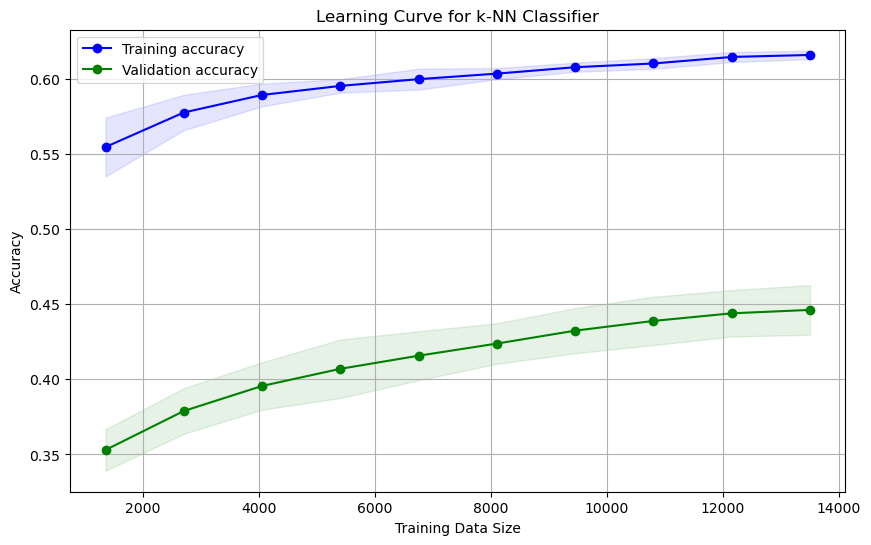

In [39]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Utilizza l'oggetto classificatore 'clf' che hai definito nel tuo screenshot
estimator=clf


X = df.drop('genre', axis=1)
y = df['genre']

# Normalizza l'intero dataset prima di passarlo alla funzione 'learning_curve'
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Ora puoi utilizzare 'X_norm' e 'y' nella funzione 'learning_curve'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf, X=X_norm, y=y, train_sizes=train_sizes, cv=10,
    scoring='accuracy', n_jobs=-1, shuffle=True, random_state=0
)


# Calcola la media e la deviazione standard dell'accuratezza del training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calcola la media e la deviazione standard dell'accuratezza del test set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotta la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve for k-NN Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()